In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import auth
auth.authenticate_user()

# Marketing Attribution Model

In [ ]:
project_id = 'inn-intarget-lab-unimi'

dataset = pd.io.gbq.read_gbq(f'''
  select *
FROM
`inn-intarget-lab-unimi.lab.marketing_attribution`
''', project_id=project_id)

In [ ]:
dataset.head(10)

,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId
0,9416183380303809617,2016-12-17,1481990278,1481990278,Organic Search,ask,organic,NaN,None
1,342964634359205532,2016-12-17,1481999067,1481999067,Organic Search,ask,organic,NaN,None
2,294887852901730140,2016-12-17,1481997033,1481997033,Organic Search,ask,organic,NaN,None
3,2904105592463883270,2016-12-17,1482038661,1482038661,Display,dfa,cpm,NaN,None
4,8140805711484568839,2016-12-17,1482030051,1482030051,Display,dfa,cpm,NaN,None
5,7963519590602421835,2016-12-17,1482028526,1482028526,Display,dfa,cpm,NaN,None
6,9876161220100888326,2016-12-17,1481995647,1481995647,Display,dfa,cpm,NaN,None
7,8745499353282780131,2016-12-17,1482014126,1482014126,Display,dfa,cpm,NaN,None
8,3372439553968695547,2016-12-17,1482005814,1482005814,Display,dfa,cpm,NaN,None
9,0502666495510238359,2016-12-17,1482016454,1482016454,Display,dfa,cpm,NaN,None


In [ ]:
dataset.shape

(903653, 9)

In [ ]:
dataset['visitStartTime'] = pd.to_datetime(dataset['visitStartTime'], unit='s')
dataset['attribution_window'] = dataset.groupby('fullVisitorId')['visitStartTime'].transform(lambda x: x + pd.DateOffset(days=30))

In [ ]:
data = dataset.sort_values(by = 'visitStartTime')
data.head(10)

,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
256670,0423043652415339154,2016-08-01,1470034812,2016-08-01 07:00:12,Direct,(direct),(none),NaN,None,2016-08-31 07:00:12
257540,8294721032567046680,2016-08-01,1470035066,2016-08-01 07:04:26,Social,youtube.com,referral,NaN,None,2016-08-31 07:04:26
256382,7718623669497357235,2016-08-01,1470035081,2016-08-01 07:04:41,Organic Search,google,organic,NaN,None,2016-08-31 07:04:41
256289,4798058133221713505,2016-08-01,1470035161,2016-08-01 07:06:01,Organic Search,google,organic,NaN,None,2016-08-31 07:06:01
257224,5076747981380011349,2016-08-01,1470035170,2016-08-01 07:06:10,Direct,(direct),(none),NaN,None,2016-08-31 07:06:10
256452,143953260196124648,2016-08-01,1470035292,2016-08-01 07:08:12,Direct,(direct),(none),NaN,None,2016-08-31 07:08:12
256463,9234156111722725905,2016-08-01,1470035429,2016-08-01 07:10:29,Direct,(direct),(none),NaN,None,2016-08-31 07:10:29
256378,1757409464136963580,2016-08-01,1470035457,2016-08-01 07:10:57,Organic Search,google,organic,NaN,None,2016-08-31 07:10:57
257544,3471645573420610711,2016-08-01,1470035501,2016-08-01 07:11:41,Social,youtube.com,referral,NaN,None,2016-08-31 07:11:41
256545,4283942788674999975,2016-08-01,1470035521,2016-08-01 07:12:01,Direct,(direct),(none),NaN,None,2016-08-31 07:12:01


In [ ]:
data.shape

(903653, 10)

In [ ]:
# in transactionId 0 - if null, 1 - if complete
data['transactionId'].fillna("0", inplace=True)

In [ ]:
grouped_data = data.groupby('transactionId')

In [ ]:
 grouped_data.head(5)

,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
256670,0423043652415339154,2016-08-01,1470034812,2016-08-01 07:00:12,Direct,(direct),(none),NaN,0,2016-08-31 07:00:12
257540,8294721032567046680,2016-08-01,1470035066,2016-08-01 07:04:26,Social,youtube.com,referral,NaN,0,2016-08-31 07:04:26
256382,7718623669497357235,2016-08-01,1470035081,2016-08-01 07:04:41,Organic Search,google,organic,NaN,0,2016-08-31 07:04:41
256289,4798058133221713505,2016-08-01,1470035161,2016-08-01 07:06:01,Organic Search,google,organic,NaN,0,2016-08-31 07:06:01
257224,5076747981380011349,2016-08-01,1470035170,2016-08-01 07:06:10,Direct,(direct),(none),NaN,0,2016-08-31 07:06:10
...,...,...,...,...,...,...,...,...,...,...
806812,03717831825503026,2017-08-01,1501641303,2017-08-02 02:35:03,Organic Search,(direct),(none),19.29,"ORD201708012493,ORD201708012493",2017-09-01 02:35:03
807172,9800325346437826374,2017-08-01,1501641559,2017-08-02 02:39:19,Referral,(direct),(none),35.58,"ORD201708012522,ORD201708012522",2017-09-01 02:39:19
807233,891256389600004515,2017-08-01,1501646467,2017-08-02 04:01:07,Referral,(direct),(none),150.69,"ORD201708012562,ORD201708012562",2017-09-01 04:01:07
806122,3101662058536674321,2017-08-01,1501647149,2017-08-02 04:12:29,Direct,(direct),(none),6.99,"ORD201708012576,ORD201708012576",2017-09-01 04:12:29


In [ ]:
data.dropna(inplace=True)
df = data
df = df.reset_index()
df.shape

(11515, 11)

In [ ]:
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')
df['attribution_window'] = df.groupby('fullVisitorId')['visitStartTime'].transform(lambda x: x + pd.DateOffset(days=30))
df = df.sort_values(by = 'visitStartTime')

In [ ]:
grouped_data = df.groupby('transactionId')

In [ ]:
grouped_data.head(5)

,index,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
0,256647,4166700707688517424,2016-08-01,1470046365,2016-08-01 10:12:45,Direct,(direct),(none),1592.40,"ORD20160801553,ORD20160801553",2016-08-31 10:12:45
1,256269,280571682929338005,2016-08-01,1470050783,2016-08-01 11:26:23,Organic Search,google,organic,12.99,"ORD20160801531,ORD20160801531",2016-08-31 11:26:23
2,256862,6332431001963915083,2016-08-01,1470052998,2016-08-01 12:03:18,Referral,(direct),(none),32.19,"ORD20160801513,ORD20160801513",2016-08-31 12:03:18
3,257715,6203401114057579951,2016-08-01,1470055898,2016-08-01 12:51:38,Referral,gatewaycdi.com,referral,72.70,"ORD20160801401,ORD20160801401",2016-08-31 12:51:38
4,256680,3213840074316400693,2016-08-01,1470057237,2016-08-01 13:13:57,Referral,(direct),(none),170.40,"ORD20160801502,ORD20160801502",2016-08-31 13:13:57
...,...,...,...,...,...,...,...,...,...,...,...
11510,806812,03717831825503026,2017-08-01,1501641303,2017-08-02 02:35:03,Organic Search,(direct),(none),19.29,"ORD201708012493,ORD201708012493",2017-09-01 02:35:03
11511,807172,9800325346437826374,2017-08-01,1501641559,2017-08-02 02:39:19,Referral,(direct),(none),35.58,"ORD201708012522,ORD201708012522",2017-09-01 02:39:19
11512,807233,891256389600004515,2017-08-01,1501646467,2017-08-02 04:01:07,Referral,(direct),(none),150.69,"ORD201708012562,ORD201708012562",2017-09-01 04:01:07
11513,806122,3101662058536674321,2017-08-01,1501647149,2017-08-02 04:12:29,Direct,(direct),(none),6.99,"ORD201708012576,ORD201708012576",2017-09-01 04:12:29


In [ ]:
df_prob = pd.DataFrame(df)
df_prob

,index,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
0,256647,4166700707688517424,2016-08-01,1470046365,2016-08-01 10:12:45,Direct,(direct),(none),1592.40,"ORD20160801553,ORD20160801553",2016-08-31 10:12:45
1,256269,280571682929338005,2016-08-01,1470050783,2016-08-01 11:26:23,Organic Search,google,organic,12.99,"ORD20160801531,ORD20160801531",2016-08-31 11:26:23
2,256862,6332431001963915083,2016-08-01,1470052998,2016-08-01 12:03:18,Referral,(direct),(none),32.19,"ORD20160801513,ORD20160801513",2016-08-31 12:03:18
3,257715,6203401114057579951,2016-08-01,1470055898,2016-08-01 12:51:38,Referral,gatewaycdi.com,referral,72.70,"ORD20160801401,ORD20160801401",2016-08-31 12:51:38
4,256680,3213840074316400693,2016-08-01,1470057237,2016-08-01 13:13:57,Referral,(direct),(none),170.40,"ORD20160801502,ORD20160801502",2016-08-31 13:13:57
...,...,...,...,...,...,...,...,...,...,...,...
11510,806812,03717831825503026,2017-08-01,1501641303,2017-08-02 02:35:03,Organic Search,(direct),(none),19.29,"ORD201708012493,ORD201708012493",2017-09-01 02:35:03
11511,807172,9800325346437826374,2017-08-01,1501641559,2017-08-02 02:39:19,Referral,(direct),(none),35.58,"ORD201708012522,ORD201708012522",2017-09-01 02:39:19
11512,807233,891256389600004515,2017-08-01,1501646467,2017-08-02 04:01:07,Referral,(direct),(none),150.69,"ORD201708012562,ORD201708012562",2017-09-01 04:01:07
11513,806122,3101662058536674321,2017-08-01,1501647149,2017-08-02 04:12:29,Direct,(direct),(none),6.99,"ORD201708012576,ORD201708012576",2017-09-01 04:12:29


In [ ]:
df.loc[:, 'transactionId'] = 1

In [ ]:
conversion_total = df['transactionId'].sum()
print(conversion_total)

11515


In [ ]:
conversion_counts = df.groupby('channelGrouping')['transactionId'].sum()
print(conversion_counts)

channelGrouping
(Other)              1
Affiliates           9
Direct            2042
Display            142
Organic Search    3438
Paid Search        468
Referral          5311
Social             104
Name: transactionId, dtype: int64


In [ ]:
def compute_channel_probabilities(df, channelGrouping, transactionId):
    # Group data by channels and count conversions
    channel_counts = df.groupby(channelGrouping)[transactionId].sum().reset_index()

    # Compute total conversions
    total_conversions = channel_counts[transactionId].sum()

    # Compute probabilities for each channel
    channel_counts['probability'] = channel_counts[transactionId] / total_conversions

    plt.bar(channel_counts[channelGrouping], channel_counts['probability'])
    plt.xlabel('Channels')
    plt.ylabel('Probability')
    plt.title('Channel Probabilities')
    plt.show()

    return channel_counts

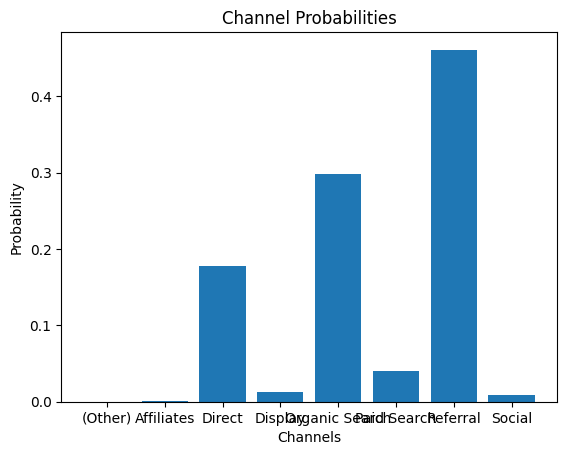

  channelGrouping  transactionId  probability
0         (Other)              1     0.000087
1      Affiliates              9     0.000782
2          Direct           2042     0.177334
3         Display            142     0.012332
4  Organic Search           3438     0.298567
5     Paid Search            468     0.040643
6        Referral           5311     0.461224
7          Social            104     0.009032


In [ ]:
channel_probabilities = compute_channel_probabilities(df_prob, 'channelGrouping', 'transactionId')
print(channel_probabilities)

In [ ]:
def compute_channel_probabilities_30(df, channelGrouping, transactionId, attribution_window):
  if not isinstance(df['visitStartTime'], pd.DatetimeIndex):
    df['visitStartTime'] = pd.to_datetime(df['visitStartTime'])
    attribution_window_str = str(attribution_window)

    # Filter data within the attribution window
    start_date = df['visitStartTime'].max() - pd.DateOffset(days=attribution_window)
    df_window = df[df['visitStartTime'] >= start_date]

    # Group data by channels and count conversions
    channel_counts = df_window.groupby(channelGrouping)[transactionId].sum().reset_index()

    # Compute total conversions
    total_conversions = channel_counts[transactionId].sum()

    # Compute probabilities for each channel
    channel_counts['probability'] = channel_counts[transactionId] / total_conversions

    # Create the bar plot
    plt.bar(channel_counts[channelGrouping], channel_counts['probability'])

    # Add labels and title
    plt.xlabel('Channels')
    plt.ylabel('Probability')
    plt.title('Channel Probabilities in the attribution window')

    # Display the plot
    plt.show()

    return channel_counts


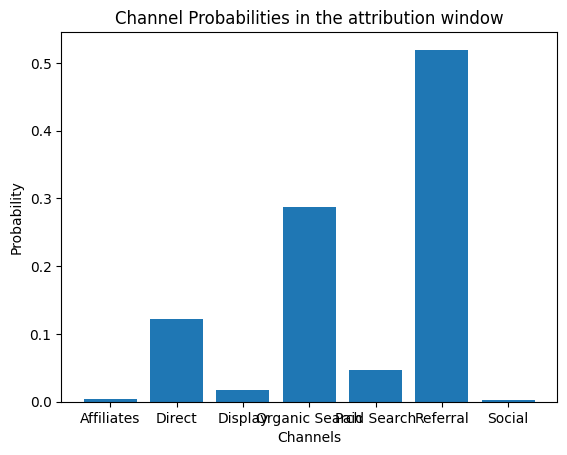

  channelGrouping  transactionId  probability
0      Affiliates              4     0.003763
1          Direct            130     0.122295
2         Display             19     0.017874
3  Organic Search            306     0.287865
4     Paid Search             50     0.047037
5        Referral            552     0.519285
6          Social              2     0.001881


In [ ]:
channel_probabilities_30 = compute_channel_probabilities_30(df_prob, 'channelGrouping', 'transactionId', 30)
print(channel_probabilities_30)

# Last click vs first click

In [ ]:
last_click = dataset.groupby('fullVisitorId')['channelGrouping'].last().value_counts().reset_index()
last_click.columns = ['channelGrouping', 'last_click']
last_click

,channelGrouping,last_click
0,Organic Search,302730
1,Social,211491
2,Direct,104246
3,Referral,63404
4,Paid Search,16381
5,Affiliates,12646
6,Display,3211
7,(Other),58


In [ ]:
def compute_channel_probabilities_last(df, channelGrouping, transactionId, attribution_window, last_click):
    # Convert attribution_window to a string
    attribution_window_str = str(attribution_window)

    # Convert transaction date to datetime if needed
    if not isinstance(df['visitStartTime'], pd.DatetimeIndex):
        df['visitStartTime'] = pd.to_datetime(df['visitStartTime'])

    # Filter data within the attribution window
    start_date = df['visitStartTime'].max() - pd.DateOffset(days=attribution_window)
    df_window = df[df['visitStartTime'] >= start_date]

    # Group data by channels and count conversions
    channel_counts = df_window.groupby(channelGrouping)[transactionId].sum().reset_index()

    # Compute total conversions
    total_conversions = channel_counts[transactionId].sum()

    # Adjust probabilities based on last click
    channel_counts = pd.merge(channel_counts, last_click, on=channelGrouping, how='left')
    channel_counts['probability_last'] = channel_counts['last_click'] / total_conversions
    total_probability = channel_counts['probability_last'].sum()
    channel_counts['probability_last'] = (channel_counts['probability_last'] / total_probability) * 100

    # Create the bar plot
    plt.bar(channel_counts[channelGrouping], channel_counts['probability_last'])

    # Add labels and title
    plt.xlabel('Channels')
    plt.ylabel('Probability')
    plt.title('Channel Probabilities (Window: ' + attribution_window_str + ' days)')

    # Display the plot
    plt.show()

    return channel_counts


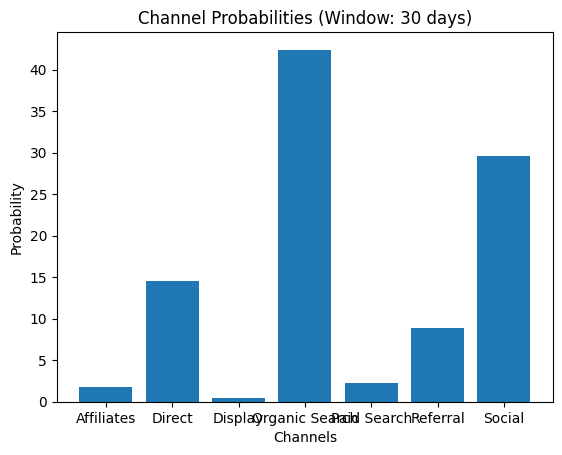

,channelGrouping,transactionId,last_click,probability_last
0,Affiliates,4,12646,1.770878
1,Direct,130,104246,14.598052
2,Display,19,3211,0.449651
3,Organic Search,306,302730,42.392688
4,Paid Search,50,16381,2.293908
5,Referral,552,63404,8.878757
6,Social,2,211491,29.616067


In [ ]:
last_probabilities = compute_channel_probabilities_last(df_prob, 'channelGrouping', 'transactionId', 30, last_click)
last_probabilities

In [ ]:
first_click = dataset.groupby('fullVisitorId')['channelGrouping'].first().value_counts().reset_index()
first_click.columns = ['channelGrouping', 'first_click']
first_click

,channelGrouping,first_click
0,Organic Search,306763
1,Social,210672
2,Direct,107594
3,Referral,58420
4,Paid Search,15877
5,Affiliates,12491
6,Display,2321
7,(Other),29


In [ ]:
def compute_channel_probabilities_first(df, channelGrouping, transactionId, attribution_window, first_click):
    # Convert attribution_window to a string
    attribution_window_str = str(attribution_window)

    # Convert transaction date to datetime if needed
    if not isinstance(df['visitStartTime'], pd.DatetimeIndex):
        df['visitStartTime'] = pd.to_datetime(df['visitStartTime'])

    # Filter data within the attribution window
    start_date = df['visitStartTime'].max() - pd.DateOffset(days=attribution_window)
    df_window = df[df['visitStartTime'] >= start_date]

    # Group data by channels and count conversions
    channel_counts = df_window.groupby(channelGrouping)[transactionId].sum().reset_index()

    # Compute total conversions
    total_conversions = channel_counts[transactionId].sum()

    # Adjust probabilities based on last click
    channel_counts = pd.merge(channel_counts, first_click, on=channelGrouping, how='left')
    channel_counts['probability_first'] = channel_counts['first_click'] / total_conversions
    total_probability = channel_counts['probability_first'].sum()
    channel_counts['probability_first'] = (channel_counts['probability_first'] / total_probability) * 100

    # Create the bar plot
    plt.bar(channel_counts[channelGrouping], channel_counts['probability_first'])

    # Add labels and title
    plt.xlabel('Channels')
    plt.ylabel('Probability')
    plt.title('Channel Probabilities (Window: ' + attribution_window_str + ' days)')

    # Display the plot
    plt.show()

    return channel_counts

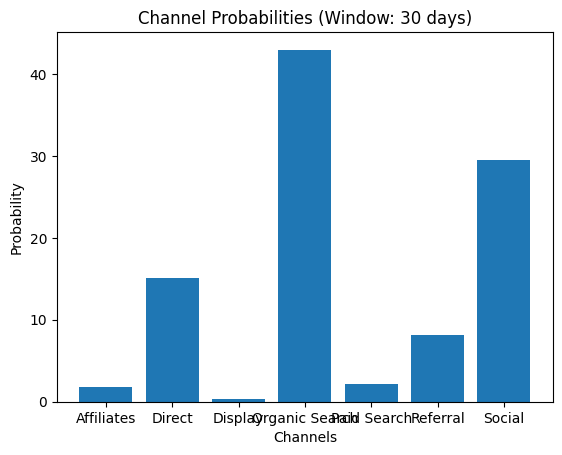

,channelGrouping,transactionId,first_click,probability_first
0,Affiliates,4,12491,1.749102
1,Direct,130,107594,15.066276
2,Display,19,2321,0.325007
3,Organic Search,306,306763,42.955703
4,Paid Search,50,15877,2.223240
5,Referral,552,58420,8.180492
6,Social,2,210672,29.500181


In [ ]:
first_probabilities = compute_channel_probabilities_first(df_prob, 'channelGrouping', 'transactionId', 30, first_click)
first_probabilities

### Comparing and evaluating the two

In [ ]:
# Merge first_probabilities and last_probabilities DataFrames
merged_probabilities = pd.merge(first_probabilities, last_probabilities, on='channelGrouping', how='inner', suffixes=('_first', '_last'))

# Display the merged DataFrame
print(merged_probabilities)


  channelGrouping  transactionId_first  first_click  probability_first  \
0      Affiliates                    4        12491           1.749102   
1          Direct                  130       107594          15.066276   
2         Display                   19         2321           0.325007   
3  Organic Search                  306       306763          42.955703   
4     Paid Search                   50        15877           2.223240   
5        Referral                  552        58420           8.180492   
6          Social                    2       210672          29.500181   

   transactionId_last  last_click  probability_last  
0                   4       12646          1.770878  
1                 130      104246         14.598052  
2                  19        3211          0.449651  
3                 306      302730         42.392688  
4                  50       16381          2.293908  
5                 552       63404          8.878757  
6                   2      21

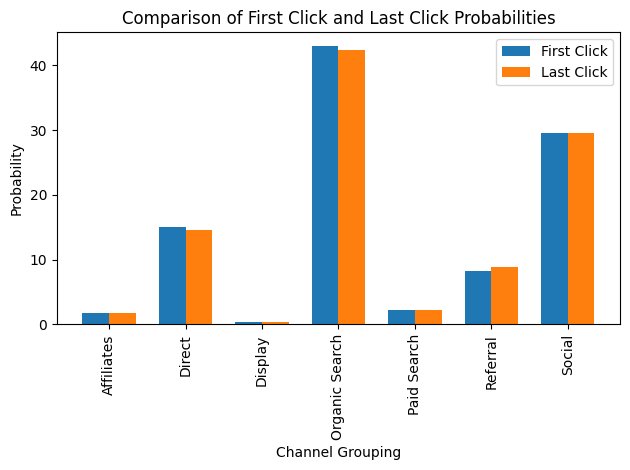

In [ ]:
# Merge first_probabilities and last_probabilities DataFrames
merged_probabilities = pd.merge(first_probabilities, last_probabilities, on='channelGrouping', how='inner', suffixes=('_first', '_last'))

# Set the x-axis data
x = merged_probabilities['channelGrouping']
x_ticks = np.arange(len(x))

# Set the y-axis data
y_first_probabilities = merged_probabilities['probability_first']
y_last_probabilities = merged_probabilities['probability_last']

# Set the width of the bars
bar_width = 0.35

# Create the grouped bar plot
plt.bar(x_ticks - bar_width/2, y_first_probabilities, width=bar_width, label='First Click')
plt.bar(x_ticks + bar_width/2, y_last_probabilities, width=bar_width, label='Last Click')

# Add labels and title
plt.xlabel('Channel Grouping')
plt.ylabel('Probability')
plt.title('Comparison of First Click and Last Click Probabilities')

# Add x-axis ticks and labels
plt.xticks(x_ticks, x, rotation='vertical')
plt.gca().set_xticklabels(x)
# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# RFM costumer analysis

In [ ]:
project_id = 'inn-intarget-lab-unimi'

dataset = pd.io.gbq.read_gbq(f'''
  select *
FROM
`inn-intarget-lab-unimi.lab.orders`
''', project_id=project_id)

In [ ]:
df_seg = dataset

In [ ]:
df_seg.head()

,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
0,9416183380303809617,2016-12-17,1481990278,2016-12-17 15:57:58,Organic Search,ask,organic,NaN,None,2017-01-16 15:57:58
1,342964634359205532,2016-12-17,1481999067,2016-12-17 18:24:27,Organic Search,ask,organic,NaN,None,2017-01-16 18:24:27
2,294887852901730140,2016-12-17,1481997033,2016-12-17 17:50:33,Organic Search,ask,organic,NaN,None,2017-01-16 17:50:33
3,2904105592463883270,2016-12-17,1482038661,2016-12-18 05:24:21,Display,dfa,cpm,NaN,None,2017-01-17 05:24:21
4,8140805711484568839,2016-12-17,1482030051,2016-12-18 03:00:51,Display,dfa,cpm,NaN,None,2017-01-17 03:00:51


In [ ]:
df_seg.tail()

,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,attribution_window
903648,3579463718000097974,2016-12-16,1481948294,2016-12-17 04:18:14,Referral,siliconvalley.about.com,referral,NaN,None,2017-01-16 04:18:14
903649,0840957349706014332,2016-12-16,1481950657,2016-12-17 04:57:37,Referral,siliconvalley.about.com,referral,NaN,None,2017-01-16 04:57:37
903650,5185708443902189235,2016-12-16,1481922147,2016-12-16 21:02:27,Referral,productforums.google.com,referral,NaN,None,2017-01-15 21:02:27
903651,383774010819667782,2016-12-16,1481901687,2016-12-16 15:21:27,Referral,productforums.google.com,referral,NaN,None,2017-01-15 15:21:27
903652,4738257231946430826,2016-12-16,1481909120,2016-12-16 17:25:20,Referral,productforums.google.com,referral,NaN,None,2017-01-15 17:25:20


In [ ]:
#let's get some info about our dataset
df_seg.info()
# Number of records in the dataset: 4 422 813


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fullVisitorId       903653 non-null  object        
 1   date                903653 non-null  dbdate        
 2   visitId             903653 non-null  Int64         
 3   visitStartTime      903653 non-null  datetime64[ns]
 4   channelGrouping     903653 non-null  object        
 5   utm_source          903653 non-null  object        
 6   utm_medium          903653 non-null  object        
 7   transactionRevenue  11515 non-null   float64       
 8   transactionId       11552 non-null   object        
 9   attribution_window  903653 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), dbdate(1), float64(1), object(5)
memory usage: 69.8+ MB


In [ ]:
df_seg= df_seg[pd.notnull(df_seg['CustomerId'])]
# we filter out any rows in our dataframe  where the 'CustomerId' column has a null value.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422813 entries, 0 to 4422812
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   CustomerId       object 
 2   country          object 
 3   InvoiceId        object 
 4   SKU              object 
 5   productPrice     float64
 6   productQuantity  Int64  
 7   Recency          int64  
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 307.9+ MB


In [ ]:
#List of all costumer's countries. It seems that the majority of the costumers are located in France.
df_seg["country"].value_counts()

France            1255249
Italy             1149773
Ukraine            406789
Spain              394441
United Kingdom     199472
                   ...   
Isle of Man             3
Laos                    3
Anguilla                2
Sudan                   2
St. Lucia               1
Name: country, Length: 200, dtype: int64

###now let's clean our data

In [ ]:
#checking for null values
df_seg.isnull().sum()
# there are no null values in our dataset

In [ ]:
# First we should determine the "starting date" for our analysis.
#convert date into string
df_seg['date'] = df_seg['date'].astype(str)
# Convert date to datetime
df_seg['date'] = pd.to_datetime(df_seg['date'], format='%Y-%m-%d')

In [ ]:
# starting date for our analysis date
most_recent_date = df_seg['date'].max()
print(most_recent_date)

In [ ]:
#just to be sure about the last date time for our analysis
filtered_df = df_seg.query("date > '2022-03-17' \
                       and date < '2022-03-30'")
# Display
filtered_df

In [ ]:
#adding a new column for the monetary variable
df_seg['Total'] = df_seg['productPrice']*df_seg['productQuantity']
df_seg

In [ ]:
from numpy.ma import count
# RFM table
# How to proceed ?
# We use groupby to CustomerId (possibility of having many dates per user). Then we choose date max bcs
 # only the most recent costumer's purchase is relevant to recency

df_rfm = df_seg.groupby('CustomerId').agg({'date':
                                            lambda x: (most_recent_date - x.max()).days,
                                            'InvoiceId': lambda x: len(x),
                                            'Total': lambda x: x.sum()})
df_rfm

In [ ]:
# Now we rename our dataframe's columns
# Recency as the number of days since last purchase ("freshness of costumer")
# Frequency as the total number of transaction of each costumer
# Monetary as the total value of a costumer's transactions

df_rfm.rename(columns={'date': 'Recency',
                         'InvoiceId': 'Frequency',
                         'Total': 'Monetary'})


In [ ]:
#setting the index of our dataframe as a column

df_rfm.reset_index(inplace=True)

df_rfm


In [ ]:
# We create a copy of our dataframe to save our data
df_copy = df_rfm.copy()
df_rfm

In [ ]:
df_rfm.info()

In [ ]:
# We have to normalize these variables in order to establish its means at 0 and its standard deviation at 1 for a more accurate analysis.
# To do this, we can use StandardScaler object from scikit-learn library to do it.
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Recency', 'Frequency', 'Monetary']
# Initialize the object
scaler = StandardScaler()

scaler.fit(df_rfm[columns_to_scale])
df_norm = scaler.transform(df_rfm[columns_to_scale])
# Let's fit and transfrom our data
#df_rfm[columns_to_scale]= scaler.fit_transform(df_rfm[columns_to_scale])
#df_rfm


In [ ]:
df_norm = pd.DataFrame(df_norm)
df_norm.info()

#CLUSTERING OUR CUSTOMERS

In [ ]:
# Now we can do clustering using our data

In [ ]:
#Before applying the K-Means algorithm we need to choose how many clusters we would like to have.
#To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide.

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from scipy.spatial.distance import cdist

plt.figure(figsize=(12,8))
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)

    distortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / df_norm.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[k] = sum(np.min(cdist(df_norm, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / df_norm.shape[0]

    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
## Now let's fit tha data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k.
#From the above plot, the k-value of 4 is the best hyperparameter for our model because the next k-value tend to have a linear trend.

model = KMeans(n_clusters=4, random_state=42)
model.fit(df_norm)
model.labels_.shape

In [ ]:
df_rfm.shape


In [ ]:
df_rfm["Cluster"] = model.labels_
df_rfm.head()

In [ ]:
# now we would like to compare distribution of mean values of recency, frequency, and monetary metrics across 4 cluster data.
df_rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

In [ ]:
# Scatterplot
# First we plot recency and frequency
#define a custom palette
rfm_fig = df_rfm.copy()
customPalette = ['#BF3EFF', '#98F5FF', '#FF83FA', '#FFD700']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Cluster','Recency','Frequency','Monetary', 'CustomerId'])

#plot data with seaborn
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

In [ ]:
#frequency and monetary
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn
facet = sns.lmplot(data= rfm_fig , x='Monetary', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

In [ ]:
rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='Monetary',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
#In the above plot, the color specifies Cluster.
#From the above plot, we can see how the customers are spread among Recency, Frequency and Monetary dimension.

#RFM based on segmation
### now we want to rank Customers based upon their recency, frequency, and monetary score

In [ ]:
#to be able to compute the RFM score we compute the quantiles for our three variables.
df_copy['r_score'] = pd.qcut(df_rfm['Recency'], 5, ['5','4','3','2','1'])   #we reversed the numbers for Recency because lower Recency is better for us.
df_copy['f_score'] = pd.qcut(df_rfm['Frequency'], 5, ['1','2','3','4','5'])
df_copy['m_score'] = pd.qcut(df_rfm['Monetary'], 5, ['1','2','3','4','5'])

#display
df_copy

In [ ]:
df_copy["RFM"]= df_copy["r_score"].astype(str)+df_copy["m_score"].astype(str)+df_copy["r_score"].astype(str)
#display
df_copy



In [ ]:
#RFM Customer Segments based on recency and frequency values
segmentation_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}



In [ ]:
df_copy['Segment'] = df_copy['r_score'].astype(str) + df_copy['f_score'].astype(str)
df_copy['Segment'] = df_copy['Segment'].replace(segmentation_map, regex=True)
df_copy.head()

In [ ]:
# Even if we did not include moentary in our segmentation we can see that the monetary mean for each segmentation is coherent within itself.
new_rfm = df_copy.groupby('Segment').mean().sort_values('Monetary')
new_rfm

# Churn Rate Forecasting

Build a model so to, according to a customer, predict the Customer Churn probability


- Define the target variable “Churn”
- consider calculated others variables (features engineer)

In [ ]:
project_id = 'inn-intarget-lab-unimi'

dataset3 = pd.io.gbq.read_gbq(f'''
  select *
FROM
`inn-intarget-lab-unimi.lab.browse_purchase`
''', project_id=project_id)

In [ ]:
crm = dataset3

In [ ]:
crm.describe()

In [ ]:
# we use the same datacolumns from the lab presentation
df = crm[['customerId','date', 'country', 'pageviews', 'timeOnSite',
           'utm_medium', 'products_added_to_cart', 'visit_with_purchase',
           'product_ids_purchased', 'products_impressions',
           'tot_revenue']]

In [ ]:
df_sorted = df.sort_values('customerId')
def process_data(df):
    df.loc[df['visit_with_purchase'] == 0, ['product_ids_purchased', 'products_impressions', 'tot_revenue']] = 0
    return df
df_crm = process_data(df_sorted)

In [ ]:
df_crm.isna().any()

In [ ]:
# check where do we have NA to work with
nan_revenue_data = df_crm[df_crm['tot_revenue'].isna()]
nan_revenue_data.head(10)


In [ ]:
df_crm[df_crm['customerId'] == "OxOZjJUJi3JeAj3xgMFsjQ=="]

In [ ]:
df_crm.at[6445090, 'tot_revenue'] = 26.805
df_crm[df_crm['customerId'] == "OxOZjJUJi3JeAj3xgMFsjQ=="]

In [ ]:
df_crm[df_crm['customerId'] == "ZpWqE5nmeBa58UmJ1gqfGw=="]

In [ ]:
mean_revenue = df_crm[df_crm['customerId'] == "ZpWqE5nmeBa58UmJ1gqfGw=="]['tot_revenue'].mean()
df_crm.loc[(df_crm['customerId'] == "ZpWqE5nmeBa58UmJ1gqfGw==") & (df_crm['tot_revenue'].isna()), 'tot_revenue'] = mean_revenue

In [ ]:
df_crm[df_crm['customerId'] == "umvuzkcTZcfw1+ez91eSdw=="]

In [ ]:
df_crm.at[6937304, 'tot_revenue'] = 38.955

In [ ]:
# others just drop since they are all NAN
df_crm.dropna(inplace=True)

In [ ]:
df_crm.shape # 9699519

### Feature engineering

###### RFM

In [ ]:
df_crm['date'] = pd.to_datetime(df_crm['date'])
recent_date = df_crm['date'].max()
print(recent_date)

In [ ]:
df_crm['Recency'] = (recent_date - df_crm.groupby('customerId')['date'].transform('max')).dt.days
df_crm['Frequency'] = df_crm.groupby('customerId')['date'].transform('nunique')
df_crm['Monetary'] = df_crm.groupby('customerId')['tot_revenue'].transform('sum')
rfm_data = df_crm[['customerId', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
rfm_data.sort_values('customerId')

###### Average dayes between sessions

the idea is to focus on those who have been in our "shop" at least 2 times

In [ ]:
multiple_sessions_customers = df_crm[df_crm['Frequency'] > 1]['customerId'].unique()
df_multiple_sessions = df_crm[df_crm['customerId'].isin(multiple_sessions_customers)]
df_multiple_sessions.sort_values(['customerId', 'date'], inplace=True)
df_multiple_sessions['DaysBetweenSessions'] = df_multiple_sessions.groupby('customerId')['date'].diff().dt.days
average_days_between_sessions = df_multiple_sessions.groupby('customerId')['DaysBetweenSessions'].mean()
df_crm = pd.merge(df_crm, average_days_between_sessions, on='customerId', how='left')
df_crm.head()

In [ ]:
df_crm['DaysBetweenSessions'] = df_crm['DaysBetweenSessions'].fillna(0)

###### Churn variable

the idea is to focus on people with purchase history, so they have been in our "shop" more than 1 time and spend some money. Also, since we don't know particular market and can't say abot the benchmark for cut-off, we've checked that 75% of people back in less that 311 days. And the last visit is without purchase

In [ ]:
d1 = df_crm[(df_crm['Monetary'] > 0) & (df_crm['Frequency'] > 1)]

In [ ]:
d1.sort_values(['customerId', 'date'], ascending=[True, False], inplace=True)
last_visit = d1.groupby('customerId').first()
last_visit['churn'] = np.where(
    (last_visit['Recency'] > 311) & (last_visit['visit_with_purchase'] == 0),
    1,
    0
)
d1 = pd.merge(d1, last_visit['Churn'], on='customerId', how='left')

## CRM model

we would like to use Logistic regression for the purpose of analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# to dummy
df_dummy = pd.get_dummies(d1[['country', 'utm_medium']], drop_first=True)
d1 = pd.concat([d1, df_dummy], axis=1)

In [ ]:
X = d1.drop(columns=['customerId','date', 'visit_with_purchase', 'product_ids_purchased ', 'Churn'])
y = d1['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)